<a href="https://colab.research.google.com/github/SANKARMOHAN/DSA_assignments/blob/main/Activity_08_group9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [6]:
data = pd.read_csv('Week_8_Q&A.csv')
data

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24


***1. Carry out descriptive analytics on the dataset.***

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


data consists of 28 rows & 3 columns with a total of 28 entries.

In [8]:
data.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


Max. and min. marks are 50 and 12 with a mean of 32.32.

In [9]:
data.Gender.value_counts()

female    16
male      12
Name: Gender, dtype: int64

In [10]:
data.groupby('Test preparation').count()

,Gender,Total Marks
Test preparation,,
completed,7,7
none,21,21


In [12]:
data.groupby('Gender').count() 

,Test preparation,Total Marks
Gender,,
female,16,16
male,12,12


there are 16 females & 12 males out of which 7 completed test preparation and 21 are not.

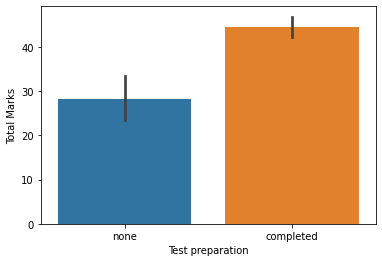

In [14]:
sns.barplot(x = 'Test preparation', y = 'Total Marks', data = data)
plt.show()

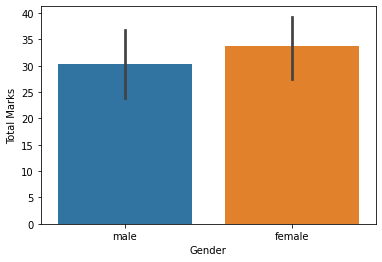

In [15]:
sns.barplot(x = 'Gender', y = 'Total Marks', data = data)
plt.show()

***2. Check whether female and male students scored the same marks.***

Hypothesis:- 
 H0: Female and Male score equal marks.  &  
H1: Female and Male does not score equal marks

In [16]:
male= data[data['Gender']=='male']
female= data[data['Gender']=='female']
male = male.drop(['Test preparation','Gender'],axis=1)
female = female.drop(['Test preparation','Gender'],axis=1)

In [17]:
male

,Total Marks
0,14
6,30
8,18
9,24
10,44
11,23
12,43
13,28
18,47
19,36


In [18]:
female

,Total Marks
1,28
2,18
3,48
4,21
5,40
7,12
14,41
15,13
16,48
17,45


In [19]:
tvalue, pvalue = stats.ttest_ind(male,female)
stats.ttest_ind(female,male)

Ttest_indResult(statistic=array([0.69408853]), pvalue=array([0.49378223]))

In [21]:
tcriteria=(stats.t.ppf((0.05/2), 26))
stats.t.ppf((0.05/2), 26)

-2.0555294386428713

In [24]:
if np.abs(tvalue)>np.abs(tcriteria) and pvalue <0.05:
    print('Female and male students scored the same marks')
else:
    print('Female and male students marks are different')

Female and male students marks are different


***3. Whether test preparation helps the students?***

Hypothesis :-  H0: test preparation helps the students &                      H1: test preparation doesn't helps the students

In [35]:
test_ptn_compltd=data[data['Test preparation']=='completed']
test_ptn_compltd

,Gender,Test preparation,Total Marks
5,female,completed,40
10,male,completed,44
12,male,completed,43
16,female,completed,48
21,male,completed,44
26,female,completed,50
27,female,completed,43


In [36]:
test_ptn_not_compltd=data[data['Test preparation']=='none']
test_ptn_not_compltd

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24
11,male,none,23


In [37]:
test_ptn_compltd=test_ptn_compltd.drop(['Test preparation','Gender'],axis=1)
test_ptn_not_compltd=test_ptn_not_compltd.drop(['Test preparation','Gender'],axis=1)
tvalue, pvalue = stats.ttest_ind(test_ptn_compltd,test_ptn_not_compltd)
stats.ttest_ind(test_ptn_compltd,test_ptn_not_compltd)

Ttest_indResult(statistic=array([3.61436375]), pvalue=array([0.00126713]))

In [39]:
tcriteria=stats.t.ppf((1-0.05), 26)
stats.t.ppf((1-0.05), 26)

1.7056179197592727

In [42]:
if (tvalue>tcriteria and pvalue <0.05):
    print('Reject H0: Test Preparation help students')
    print('which means test preparation doesnot help students')
else:
    print('Reject H1:Test Preparation does not help students')
    print('which means test preparation help students')

Reject H0: Test Preparation help students
which means test preparation doesnot help students
